### Colab Activity 16.1: Polynomial Features and Classification

**Expected Time = 30 minutes** 


This activity focuses on comparing versions of logistic regression classifier on a wine dataset from Scikit-Learn.  Your goal is to understand how the performance changes and the decision boundary is effected.  


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)


Run the code cells below to import the necessary libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn import set_config
set_config(display="diagram")
import seaborn as sns

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X1 = X[['total_phenols', 'color_intensity']]

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

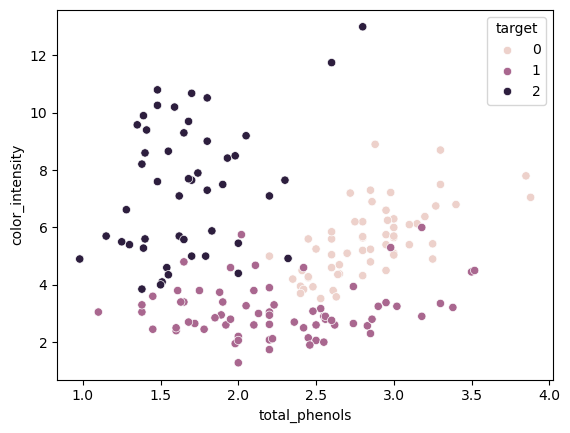

In [5]:
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y)

[Back to top](#-Index)

### Problem 1

#### Logistic Regression



Below, fit a `LogisticRegression` estimator with `multi_class = 'multinomial'` on `X1` and `y`. Assign the result to `lgr`.

Uncomment the code to visualize the decision boundary of the resulting estimator assigned to `lgr` below.

In [7]:

lgr = ''

lgr = LogisticRegression()
lgr.fit(X1, y)

### ANSWER CHECK
lgr

LogisticRegression()

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

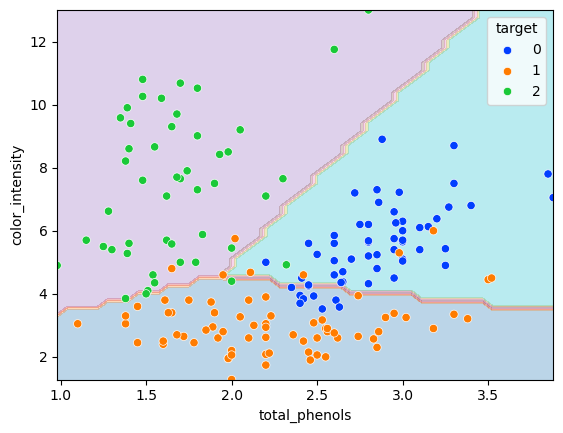

In [9]:
## Uncomment to visualize the decision boundary for lgr
xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
grid = pd.DataFrame(np.c_[XX.ravel(), YY.ravel()],
                   columns=['total_phenols', 'color_intensity'])
labels = pd.factorize(lgr.predict(grid))[0]

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')

[Back to top](#-Index)

### Problem 2

#### Logistic Regression with Quadratic Features



Below, create and fit a `Pipeline` named `quad_pipe` with steps: 

- `poly`: Create quadratic features with `PolynomialFeatures` with `degree` equal to 2.
- `scale`: `StandardScaler` applied to polynomial features
- `lgr`: `LogisticRegression` with `multi_class = 'multinomial'`

Fit this pipeline to the data `X1` and `y`.

Visualize the decision boundary by uncommenting the code below.

In [10]:

quad_pipe = ''

quad_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scale', StandardScaler()),
    ('lgr', LogisticRegression())
])

quad_pipe.fit(X1, y)

### ANSWER CHECK
quad_pipe

Pipeline(steps=[('poly', PolynomialFeatures()), ('scale', StandardScaler()),
                ('lgr', LogisticRegression())])

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

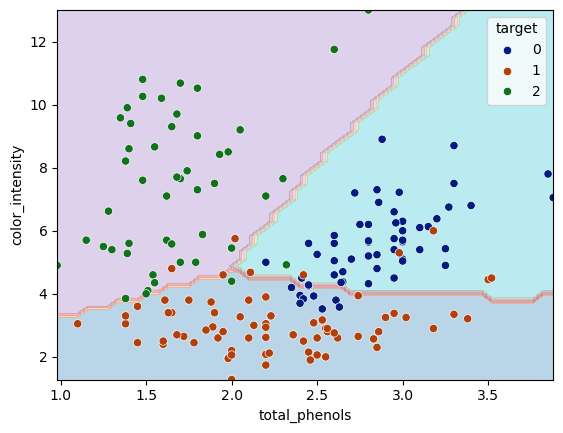

In [11]:
## Uncomment to visualize pipeline boundary
labels = pd.factorize(quad_pipe.predict(grid))[0]
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y, palette = 'dark')

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

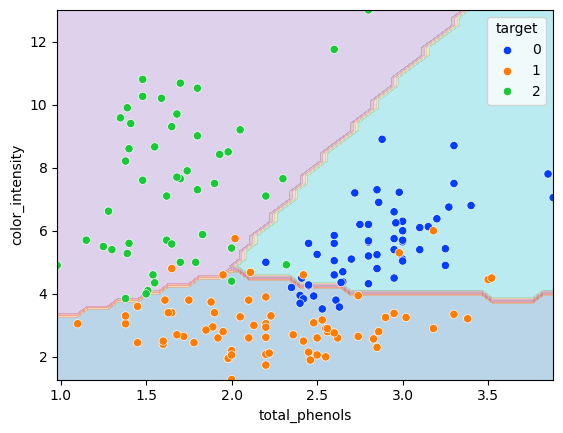

In [12]:
## Uncomment to visualize the decision boundary for quad_pipe
labels = pd.factorize(quad_pipe.predict(grid))[0]

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')

[Back to top](#-Index)

### Problem 3

#### Logistic Regression with Degree 5 features



Below, create and fit a `Pipeline` named `quintic_pipe` with steps: 

- `poly`: Create quadratic features with `PolynomialFeatures` with `degree` equal to 5.
- `scale`: `StandardScaler` applied to polynomial features
- `lgr`: `LogisticRegression` with `multi_class = 'multinomial'`

Fit this pipeline to the data `X1` and `y`.



In [14]:

quintic_pipe = ''

quintic_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=5)),
    ('scale', StandardScaler()),
    ('lgr', LogisticRegression())
])

quintic_pipe.fit(X1, y)

### ANSWER CHECK
quintic_pipe

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('scale', StandardScaler()), ('lgr', LogisticRegression())])

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

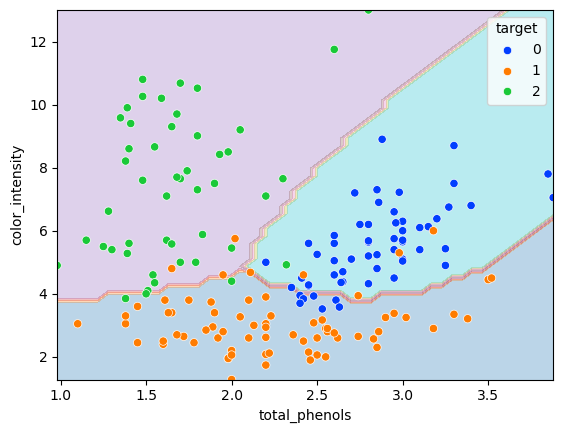

In [15]:
## Uncomment to visualize the decision boundary for quintic_pipe
labels = pd.factorize(quintic_pipe.predict(grid))[0]

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')

# Summary and Key Takeaways

This notebook demonstrates the progression of complexity in decision boundaries for multi-class classification using the wine dataset, focusing on two features: 'total_phenols' and 'color_intensity'.

## Key Takeaways

### 1. Linear Boundaries (Problem 1)
- Basic logistic regression creates linear decision boundaries
- Simple but might not capture complex relationships in the data
- Most interpretable model among the three

### 2. Quadratic Transformation (Problem 2)
- Introduces polynomial features of degree 2
- Creates more flexible, curved decision boundaries
- Pipeline combines feature transformation, scaling, and classification
- Better captures non-linear relationships while maintaining reasonable complexity

### 3. Quintic Transformation (Problem 3)
- Uses polynomial features of degree 5
- Creates highly complex decision boundaries
- Shows how increasing polynomial degree allows for more flexible boundaries
- Risk of overfitting increases with higher polynomial degrees

## Overall Learning
1. Feature transformation can significantly impact model complexity
2. Pipeline usage ensures proper order of operations (transform → scale → fit)
3. Visual representation of decision boundaries helps understand model behavior
4. Trade-off between model complexity and potential overfitting

# Summary and Key Takeaways

This notebook demonstrates the progression of complexity in decision boundaries for multi-class classification using the wine dataset, focusing on two features: 'total_phenols' and 'color_intensity'.

## Key Takeaways

### 1. Linear Boundaries (Problem 1)
- Basic logistic regression creates linear decision boundaries
- Simple but might not capture complex relationships in the data
- Most interpretable model among the three

### 2. Quadratic Transformation (Problem 2)
- Introduces polynomial features of degree 2
- Creates more flexible, curved decision boundaries
- Pipeline combines feature transformation, scaling, and classification
- Better captures non-linear relationships while maintaining reasonable complexity

### 3. Quintic Transformation (Problem 3)
- Uses polynomial features of degree 5
- Creates highly complex decision boundaries
- Shows how increasing polynomial degree allows for more flexible boundaries
- Risk of overfitting increases with higher polynomial degrees

## Overall Learning
1. Feature transformation can significantly impact model complexity
2. Pipeline usage ensures proper order of operations (transform → scale → fit)
3. Visual representation of decision boundaries helps understand model behavior
4. Trade-off between model complexity and potential overfitting